<a href="https://colab.research.google.com/github/Homedepot5/DataScience/blob/deeplearning/GPUBenchMarking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
# Version Information
# tensorflow 2.2.0 , Cudnn7.6.5 and Cuda 10.1 , python 3.8

In [5]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU')]

In [6]:
tf.__version__

'2.3.0'

In [7]:
tf.test.is_built_with_cuda()



True

In [8]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [9]:
len(X_train)

50000

In [10]:
X_train.shape

(50000, 32, 32, 3)

In [11]:
y_train.shape

(50000, 1)

Data Visualization

In [12]:
def plot_sample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(X_train[index])

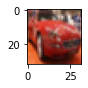

In [13]:
plot_sample(5)

In [14]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [15]:
classes[y_train[3][0]]

'deer'

In [16]:

X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [17]:
X_train_scaled.shape

(50000, 32, 32, 3)

In [18]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

In [19]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [20]:
y_train_categorical[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')    
    ])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 104s 67ms/step - loss: 1.8596 - accuracy: 0.3348
Epoch 2/50
1563/1563 [==============================] - 106s 68ms/step - loss: 1.6588 - accuracy: 0.4124
Epoch 3/50
1563/1563 [==============================] - 109s 69ms/step - loss: 1.5723 - accuracy: 0.4445
Epoch 4/50
1563/1563 [==============================] - 103s 66ms/step - loss: 1.5094 - accuracy: 0.4674
Epoch 5/50
1563/1563 [==============================] - 106s 68ms/step - loss: 1.4577 - accuracy: 0.4865
Epoch 6/50
1563/1563 [==============================] - 107s 69ms/step - loss: 1.4138 - accuracy: 0.4976
Epoch 7/50
1462/1563 [===========================>..] - ETA: 6s - loss: 1.3734 - accuracy: 0.5147

In [ ]:
np.argmax(model.predict(X_test_scaled)[0])

In [ ]:
classes[y_test[0][0]]

CPU BENCHMARKING

In [ ]:
def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,32,3)),
            keras.layers.Dense(3000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')    
        ])

    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
cpu_model = get_model()
cpu_model.fit(X_train_scaled,y_train_categorical,epochs=1)